# Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

`import sys` <br>
`sys.path.append('/*SOME_PATH*/my_code/my_utils')` <br>
`from utils.plot import plot_denisty` <br>

<br>    
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

В данной домашке вам предлагается реализовать две функции на датасете титаник, немного измененном следующим образом:

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic/train.csv')
df.Embarked.replace('Q', '', inplace=True)
df.PassengerId = df.PassengerId.astype('string')

## tool: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

In [ ]:
def get_df_info(df, thr=0.8):
    '''
    Выводит инфу о колонках датафрейма в виде датафрейма.

    Параметры:
    ----------
    df: pd.DataFrame
        Исходный датафрейм, для которого нужно получить информацию о колонках.
    thr: float, optional
        Порог для определения высокого значения vc_max_ratio при расчете trash_score (по умолчанию 0.8).

    Возвращает:
    -----------
    pd.DataFrame
        Датафрейм с информацией о колонках. Колонки включают:
        - dtype: тип данных колонки
        - unique_count: количество уникальных элементов
        - nan_ratio: доля NaN значений
        - zero_ratio: доля нулей (для числовых колонок)
        - empty_str_ratio: доля пустых строк (для строковых колонок)
        - vc_max_value: самый частый элемент в колонке (без NaN)
        - vc_max_ratio: доля самого частого элемента
        - example_1, example_2: два примера значений из колонки (без NaN)
        - trash_score: показатель "мусорности" колонки
    '''

    # Создаем пустой словарь для сбора информации о колонках
    columns_info = {}

    for col in df.columns:
        col_data = df[col]


        dtype = col_data.dtype.name


        n_unique = col_data.nunique(dropna=False)


        nan_ratio = col_data.isna().mean()


        if pd.api.types.is_numeric_dtype(col_data):
            zero_ratio = (col_data == 0).mean()
        else:
            zero_ratio = ''


        if pd.api.types.is_string_dtype(col_data):
            empty_str_ratio = (col_data == '').mean()
        else:
            empty_str_ratio = ''


        vc = col_data.value_counts(dropna=True)
        if not vc.empty:
            vc_max_value = vc.index[0]
            vc_max_ratio = vc.iloc[0] / len(col_data)
        else:
            vc_max_value = None
            vc_max_ratio = ''

        # Два разных примера значений (без учета NaN)
        unique_values = col_data.dropna().unique()
        if len(unique_values) > 0:
            example_1 = unique_values[0]
            example_2 = unique_values[1] if len(unique_values) > 1 else 'n/a'
        else:
            example_1 = 'n/a'
            example_2 = 'n/a'

        # Вычисляем trash_score
        combined_ratio = max(nan_ratio + (zero_ratio if zero_ratio != '' else 0) + (empty_str_ratio if empty_str_ratio != '' else 0),
                             vc_max_ratio if vc_max_ratio > thr else 0)

        columns_info[col] = {
            'dtype': dtype,
            'unique_count': n_unique,
            'nan_ratio': round(nan_ratio, 3) if nan_ratio > 0 else '0',
            'zero_ratio': round(zero_ratio, 3) if zero_ratio != '' and zero_ratio > 0 else '0',
            'empty_str_ratio': round(empty_str_ratio, 3) if empty_str_ratio != '' and empty_str_ratio > 0 else '0',
            'vc_max_value': vc_max_value,
            'vc_max_ratio': round(vc_max_ratio, 3) if vc_max_ratio != '' and vc_max_ratio > 0 else '0',
            'example_1': example_1,
            'example_2': example_2,
            'trash_score': round(combined_ratio, 3) if round(combined_ratio, 3) != 0 else '0'
        }

    # Преобразуем словарь в датафрейм
    return pd.DataFrame.from_dict(columns_info, orient='index')

In [ ]:
# ваш пример
get_df_info(df)

,dtype,unique_count,nan_ratio,zero_ratio,empty_str_ratio,vc_max_value,vc_max_ratio,example_1,example_2,trash_score
PassengerId,string,891,0,0,0,1,0.001,1,2,0
Survived,int64,2,0,0.616,0,0,0.616,0,1,0.616
Pclass,int64,3,0,0,0,3,0.551,3,1,0
Name,object,891,0,0,0,"Braund, Mr. Owen Harris",0.001,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...",0
Sex,object,2,0,0,0,male,0.648,male,female,0
Age,float64,89,0.199,0,0,24.0,0.034,22.0,38.0,0.199
SibSp,int64,7,0,0.682,0,0,0.682,1,0,0.682
Parch,int64,7,0,0.761,0,0,0.761,0,1,0.761
Ticket,object,681,0,0,0,347082,0.008,A/5 21171,PC 17599,0
Fare,float64,248,0,0.017,0,8.05,0.048,7.25,71.2833,0.017


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

get_df_info(df)

,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
,,,,,,,,,
Cabin,object,147,C148,B42,-1,n: 0.771,-1,"(0.02, G6)",0.771
Parch,int64,7,6,4,z: 0.761,-1,-1,"(0.761, 0)",0.761
SibSp,int64,7,8,5,z: 0.682,-1,-1,"(0.682, 0)",0.682
Survived,int64,2,1,0,z: 0.616,-1,-1,"(0.616, 0)",0.616
Age,float64,88,74.0,34.5,-1,n: 0.199,-1,"(0.042, 24.0)",0.199
Embarked,object,3,'',C,-1,n: 0.002,e: 0.086,"(0.724, S)",0.089
Fare,float64,248,10.5167,9.8458,z: 0.017,-1,-1,"(0.048, 8.05)",0.017
Ticket,object,681,370376,111369,-1,-1,-1,"(0.008, 347082)",-1
Sex,object,2,female,male,-1,-1,-1,"(0.648, male)",-1


## tool: распределения признаков (6 баллов)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке и ответить на вопрос в конце

**!** Обновите matplotlib, seaborn до последней версии

In [ ]:
!pip install --upgrade matplotlib seaborn

Нужно реализовать рисовалку распределения колонок датафрейма через функцию или через класс, как вам удобней.
    Отрисовываемые колонки принимаются на вход. Далее вы для каждой такой колонки создаете `fig, ax` и отрисовываете туда то,
    что описано ниже в задании. Также, на вход принимается hue-колонка (см. семинар), по которой бьется раскраска.

- для числовых колонок
    - sns.histplot
        - предобработка данных: принимайте на вход флажок `drop_zero`. Если он True, выкиньте все нули прежде чем рисовать
        - количество бинов остается за вами
        - используйте аргументы `multiple='stack'`, `element='step'` (самый быстрый), `stat='count'`,
            `alpha=0.8` (чтобы подогнать цвет гистограммы под остальные цвета, без этого будет слишком яркий график)
        
    - sns.boxenplot + sns.stripplot
        - предобработка данных: если `drop_zero`, рисуем оба графика без нулей
        - в boxenplot используйте `showfliers=False`, выбросы будут подсвечиваться stripplot'ом
        - в stripplot не нужно рисовать все точки, нужно засэмплировать немного (напр. 200)
        
    - special (0, np.nan)
        - это будет sns.barplot, показывающий распределение по спец. значениям - нулям и нанам
        - предобработка данных: посчитайте для каждого значения колонки `hue` (см. groupby) долю нанов и нулей
            (независимо от `drop_zero`), оберните в датафрейм и отрисуйте с помощью sns.barplot
        - вместо чистого нуля используйте что-то отрицательное (напр. -0.1 * [значение самого высокого бина])
        - используйте у barplot аргумент `edgecolor='black'`
        - добавьте `ax.axhline(0, color='black', ls='--')` на этот же ax, чтобы четко выделить 0
        - добавьте горизонтальную решетку `ax.grid(True, axis='y')`
        
    
- для категориальных колонок
    - категориальными считаем все (числовые / нечисловые) колонки c количеством уникальных
        значений меньше `max_cat_thr`: принимаем на вход (напр. 20)
        
    - sns.countplot + обработка пустых строк, нанов
        - предобработка данных: замените все наны и пустые строки на понятные вам спецстроки для наглядности (см. пример)
        - используйте `stat='count'`, `edgecolor='black'`
        - добавьте горизонтальную решетку
        - поверните выводимые значения на оси X на 90 градусов `ax.tick_params('x', rotation=90)`
        
        
- общее:
    - убедитесь, что не рисуете колонку, которую передаете в hue, а также колонки, которые не попали ни в числовые,
        ни в категориальные
    
    - настройте `ax.set_title`, `fig.suptitle` - пусть они помогают вам и нам быстро разобраться, что на графике.
        Не нужно подписывать, что на графике histplot или что-то подобное, лучше подпишите какое-нибудь уточнение к графику,
        например, что ящики построены без учета выбросов. Однако, не нужно плодить лишнего.
    
    - уберите все ненужные `ax.set_xlabel`, `ax.set_ylabel`
    
    - пусть на каждую колонку у вас будет по одной легенде на любом из графиков
    
    - настройте у графиков аргумент `hue_order`, чтобы заранее зафиксировать порядок раскраски.
        Например, если ваша hue-колонка Survived, то `hue_order=[0, 1]` зафиксирует, что у вас все что относится к значению 0
        всегда покрасится в первый цвет, а к 1 - во второй. Если вы не будете так делать, вам не всегда гарантируется ожидаемая
        покраска.
    
    - настройте достаточно крупный размер шрифта у всего, у чего можно - аргумент `fontsize`,
        но `ax.tick_params(..., labelsize=)` (напр. 15). Заметка: если создавать легенду через ax.legend(...), задать ей размер
        шрифта можно с помощью аргумента `fontsize`. Но если делать автолегенду в сиборновских функциях (аргумент legend), то
        поменять ей размер шрифта уже очень сложно. Выход - заранее задать в матплотлибе размер шрифта легенды по умолчанию на
        достаточно крупный (код ниже).

    - НЕ объединяйте пустые строки, наны, и т.п. в один "мусорный" бин. Зачастую спецзначения - самая ценная информация по колонке,
        которую никак нельзя терять таким объединением.
        
        
- про адекватность: ниже дан пример того, что у вас может получиться. Там не везде настроен размер шрифтов и не везде интуитивно
    вам понятные titles, но в остальном - пойдет. Главное - чтобы все было хорошо видно и не было лишнего.
    
    
- на будущее: пытаясь применить эту рисовалку на других датасетах, вы столкнетесь с множеством проблем, поскольку задание
    сформулировано только для титаника, и чтобы не переусложнять, не включает в себя разные нюансы.
    Пусть вас это не пугает - переписывайте, добавляйте, исправляйте, все получится! Иметь корректно работающую на любом
    датасете рисовалку очень полезно :)
    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# настройка размера шрифта легенды
mpl.rcParams['legend.title_fontsize'] = 13
mpl.rcParams['legend.fontsize'] = 13

In [ ]:
def plot_density(df, hue=None, cols=None, drop_zero=False, max_cat_thr=20, hue_order=None):
    """
    Рисует распределения колонок датафрейма.

    :param df: Исходный датафрейм
    :param hue: Колонка для раскраски (например, 'Survived')
    :param cols: Список колонок для отрисовки. Если None, рисуются все колонки, кроме hue
    :param drop_zero: Если True, нули исключаются перед построением графика
    :param max_cat_thr: Порог уникальных значений, ниже которого колонка считается категориальной
    :param hue_order: Порядок значений в hue-колонке для управления цветами
    """

    # Если не переданы колонки, рисуем все, кроме hue
    if cols is None:
        cols = [col for col in df.columns if col != hue]

    for col in cols:
        col_data = df[col]

        if hue == 'Survived' and hue_order is None:
            hue_order = [0, 1]

        if col == hue:
            continue
        # Игнорируем колонки, которые полностью пусты или содержат только NaN
        if col_data.dropna().empty:
            continue

        # Определяем тип колонки
        if pd.api.types.is_numeric_dtype(col_data) and col_data.nunique() > max_cat_thr:
            # Числовая колонка

            # 1. sns.histplot
            fig, ax = plt.subplots(figsize=(10, 6))
            data = col_data if not drop_zero else col_data[col_data != 0]

            # Создаем датафрейм для правильного формата
            plot_data = pd.DataFrame({col: data, hue: df[hue]}) if hue else pd.DataFrame({col: data})

            sns.histplot(data=plot_data, x=col, hue=hue, multiple='stack', element='step',
                         stat='count', alpha=0.8, ax=ax, hue_order=hue_order)
            ax.set_title(f"Распределение {col} (гистограмма)", fontsize=15)
            plt.show()

            # 2. sns.boxenplot + sns.stripplot
            fig, ax = plt.subplots(figsize=(10, 6))
            data = col_data if not drop_zero else col_data[col_data != 0]
            sns.boxenplot(x=df[hue] if hue else None, y=data, ax=ax, showfliers=False, hue_order=hue_order)
            sns.stripplot(x=df[hue] if hue else None, y=data, ax=ax, color='black', size=4, jitter=True, hue_order=hue_order)
            ax.set_title(f"Boxenplot + Stripplot для {col}", fontsize=15)
            plt.show()

            # 3. Специальное распределение по нулям и NaN
            fig, ax = plt.subplots(figsize=(10, 6))
            zero_nan_data = df.groupby(hue)[[col]].apply(lambda x: pd.Series({
                'zeros': (x[col] == 0).mean(),
                'nans': x[col].isna().mean()
            })).reset_index()
            zero_nan_data = pd.melt(zero_nan_data, id_vars=[hue], value_vars=['zeros', 'nans'], var_name='special_value', value_name='ratio')
            sns.barplot(x='special_value', y='ratio', hue=hue, data=zero_nan_data, edgecolor='black', ax=ax, hue_order=hue_order)
            ax.axhline(0, color='black', ls='--')
            ax.grid(True, axis='y')
            ax.set_title(f"Спец. распределение {col} (нулевые и NaN)", fontsize=15)
            plt.show()

        elif col_data.nunique() <= max_cat_thr:
            if col == hue:
                continue
            # Категориальная колонка
            fig, ax = plt.subplots(figsize=(10, 6))

            # Заменяем NaN и пустые строки
            data = col_data.fillna('NaN').replace('', 'Empty')

            sns.countplot(x=data, hue=df[hue] if hue else None, ax=ax, edgecolor='black', hue_order=hue_order)
            ax.grid(True, axis='y')
            ax.tick_params('x', rotation=90)
            ax.set_title(f"Распределение {col} (категориальная)", fontsize=15)
            plt.show()


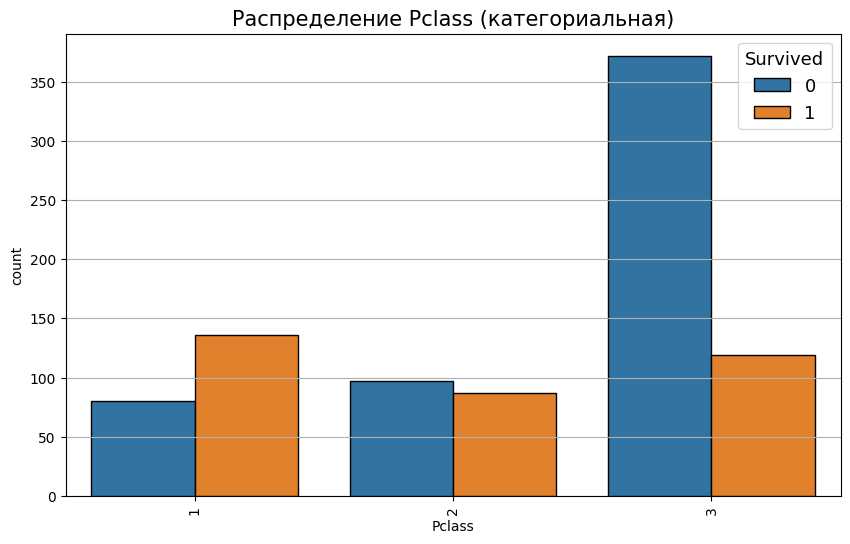

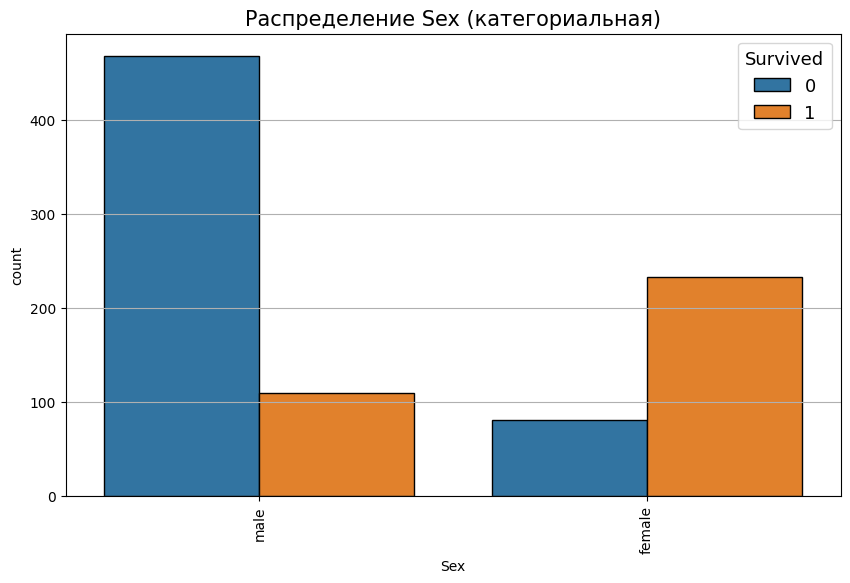

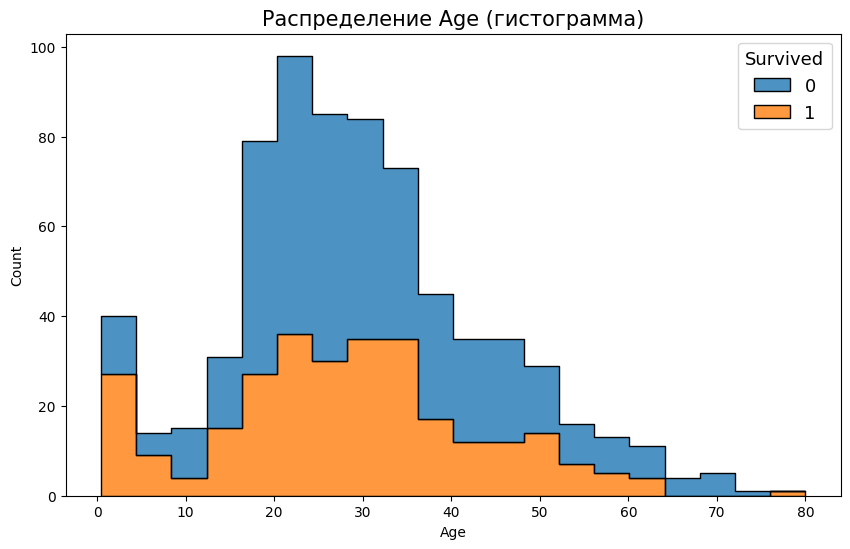

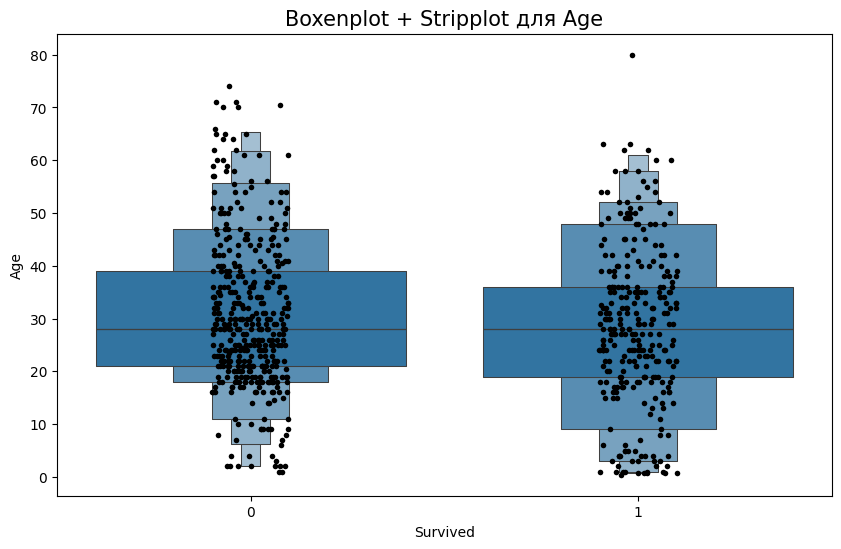

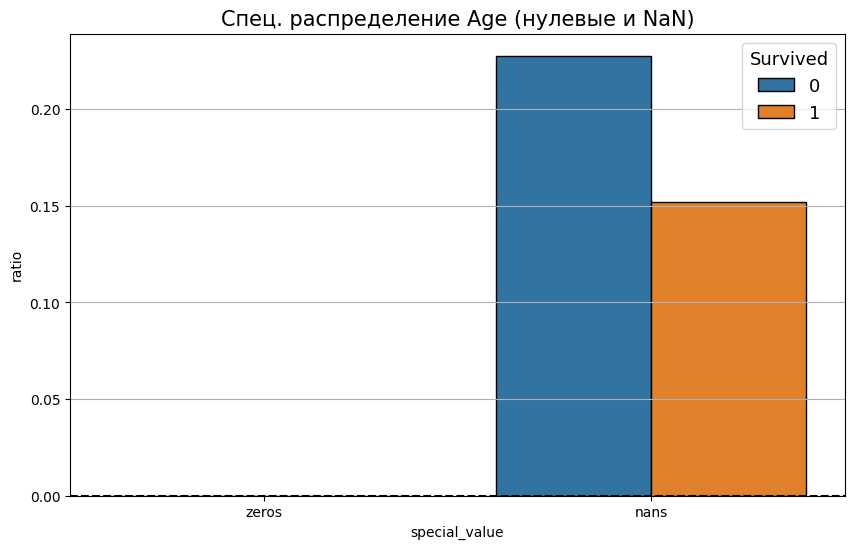

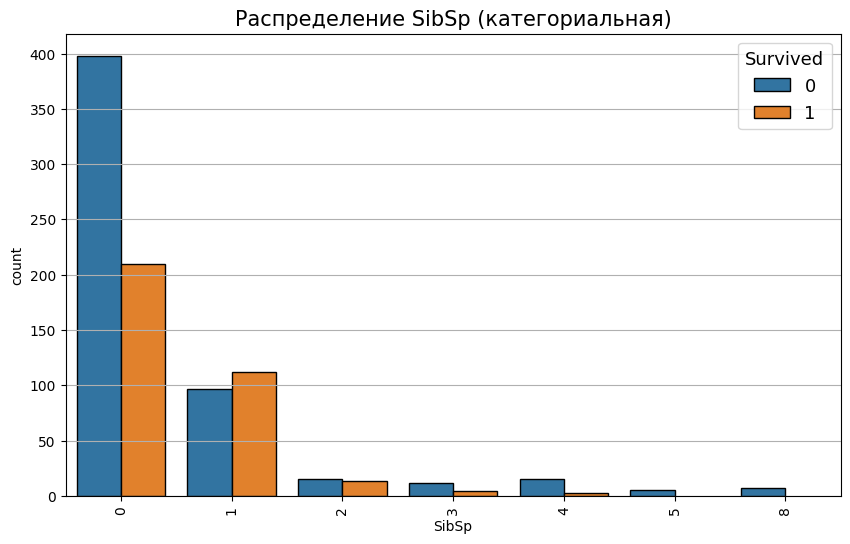

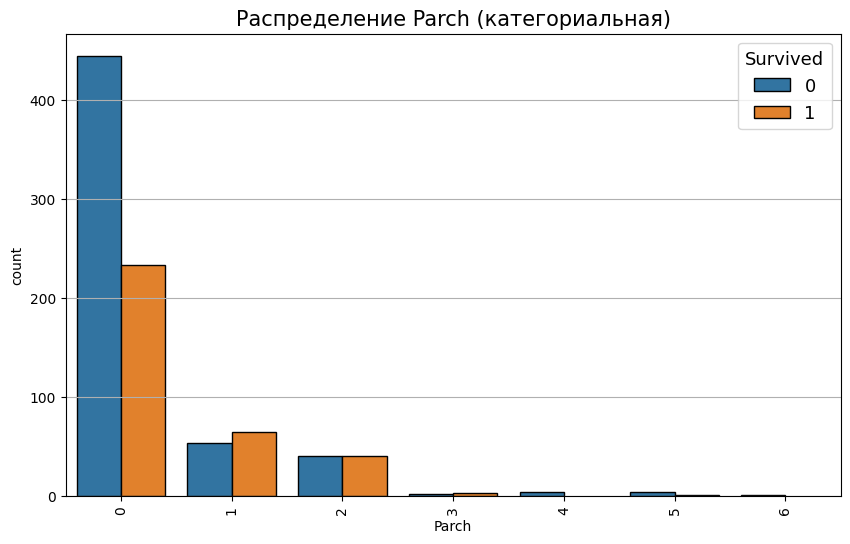

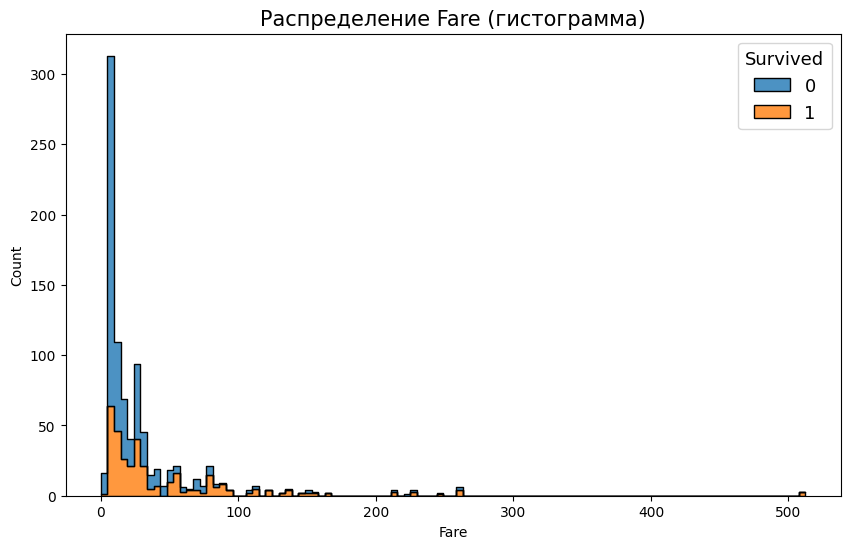

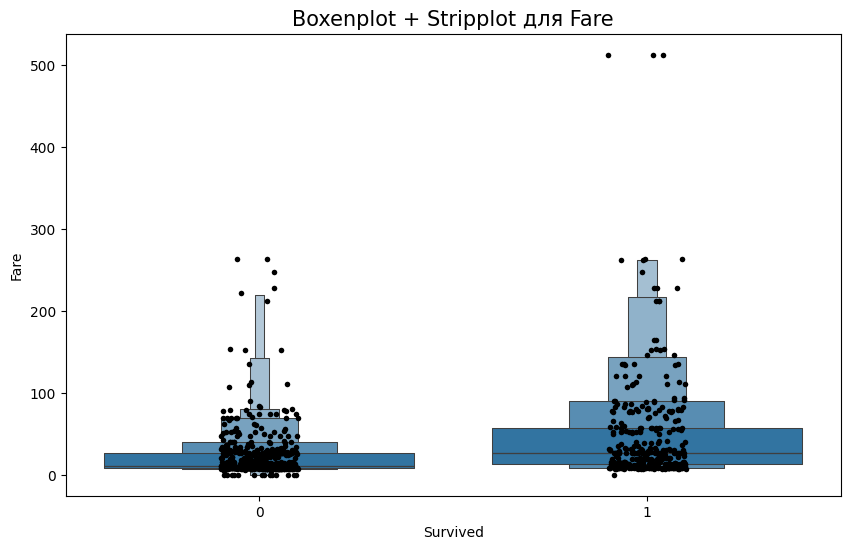

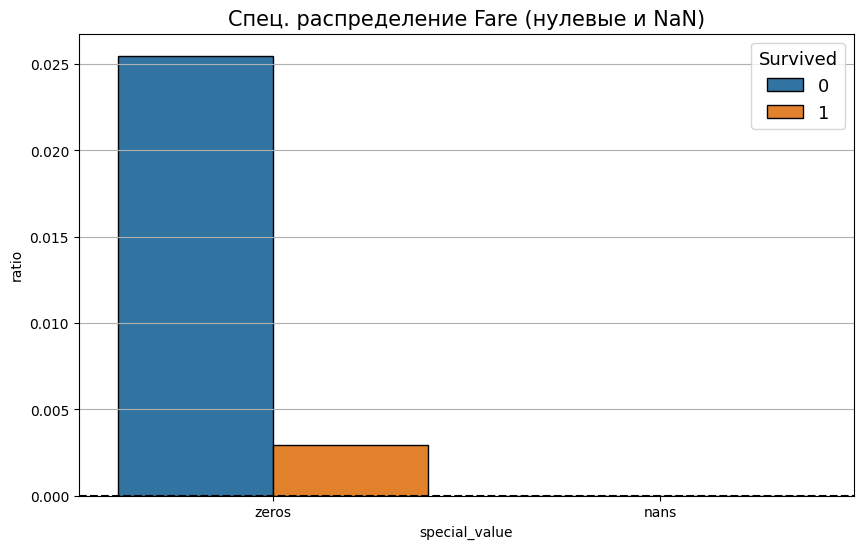

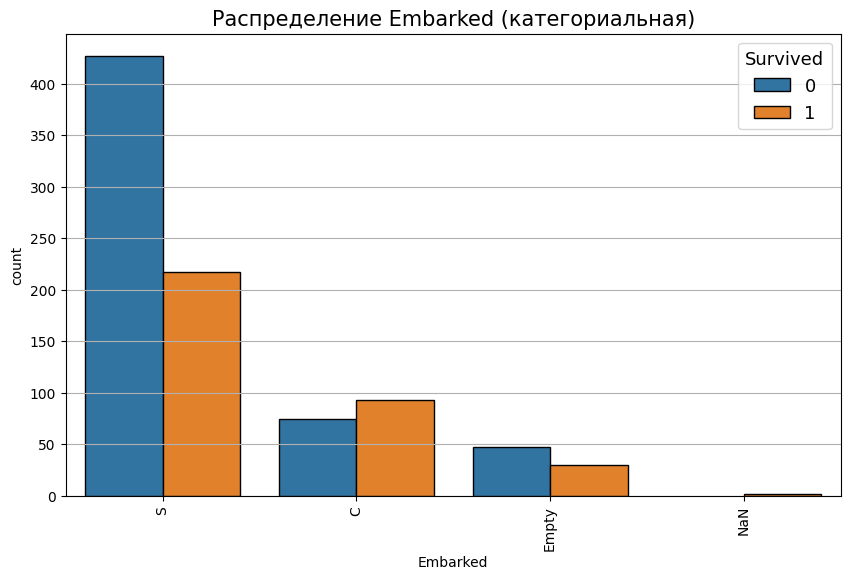

In [ ]:
# ваш пример
plot_density(df, hue='Survived', cols=df.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
################################################################################


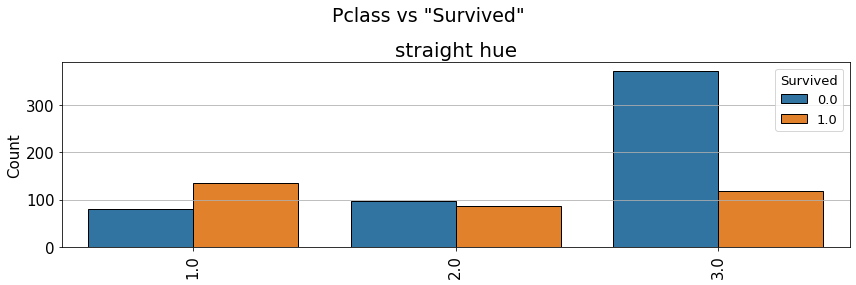

################################################################################


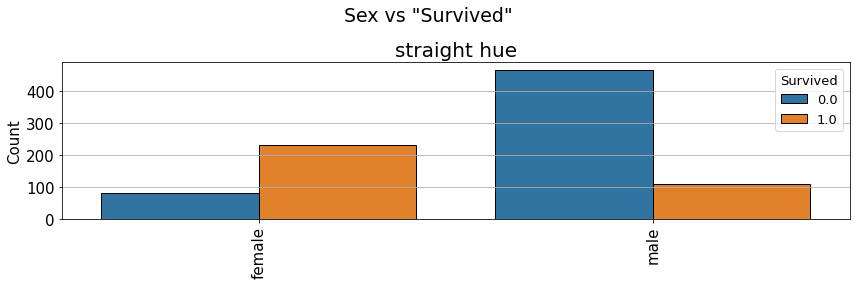

################################################################################


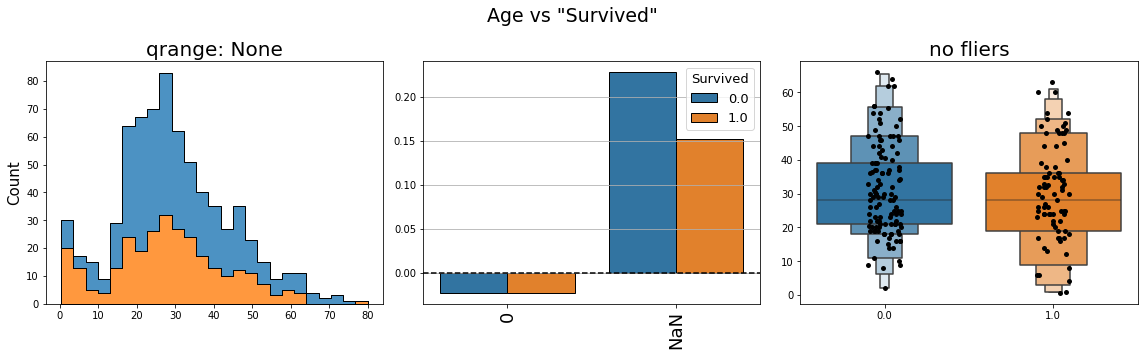

################################################################################


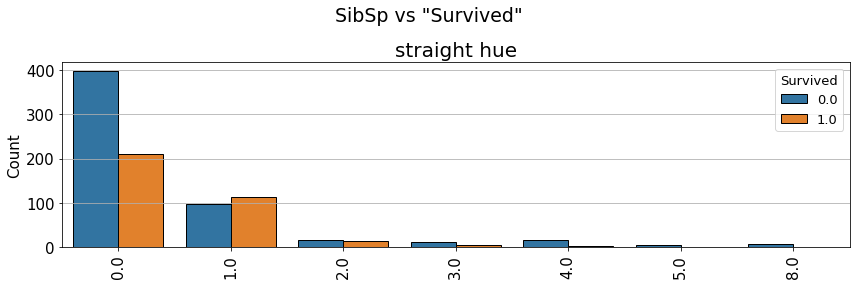

################################################################################


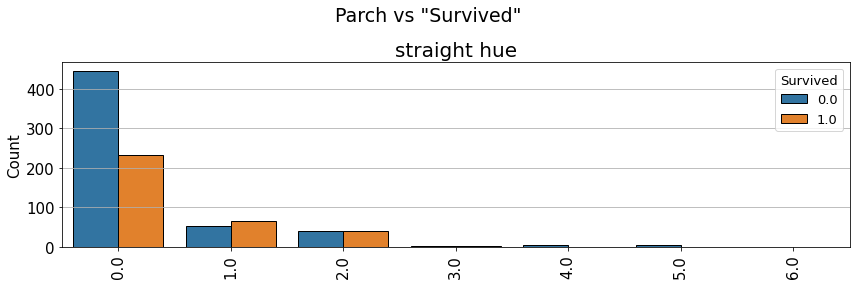

################################################################################


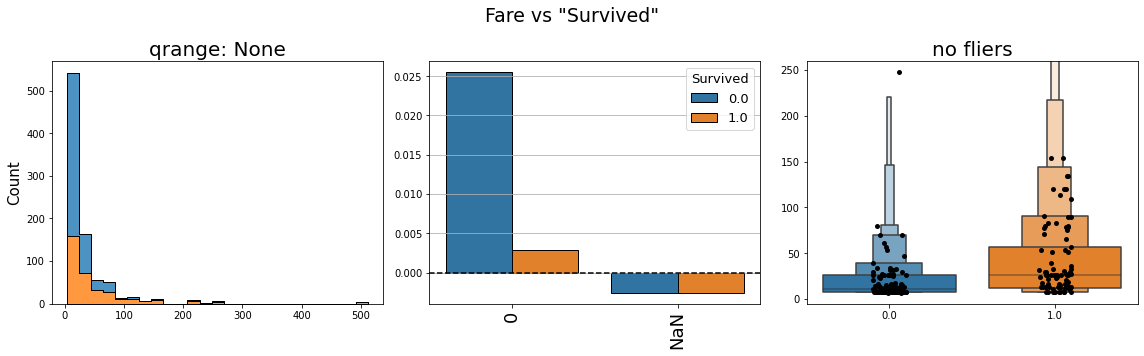

################################################################################


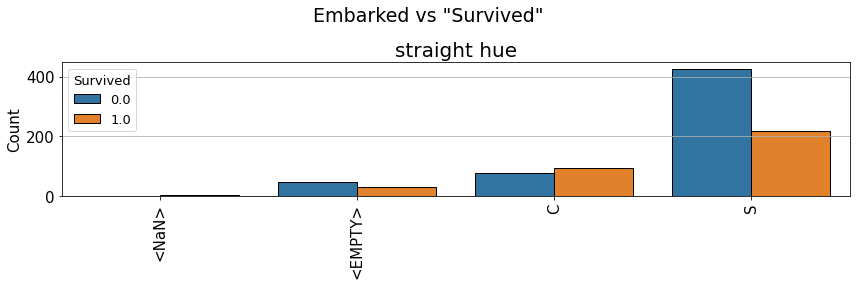

################################################################################


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

plot_density(df, hue='Survived')

***Вопрос:*** Как вы думаете, какие проблемы с этой рисовалкой могут возникнуть при применении ее на других датасетах?

In [ ]:
#В случае, если новые данные содержат колонки с нечисловыми значениями или с неординарными форматами, например, строки, функции визуализации могут не работать должным образом (например, если в числовой колонке будут текстовые значения).
#Если количество уникальных значений в колонках слишком велико, это может привести к созданию перегруженных графиков, которые трудно интерпретировать.